In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

/Users/fahimahammedfiroz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
conv_base=tf.keras.applications.VGG16(
    include_top = False,
    input_shape=(32,32,3)
)

In [3]:
conv_base.trainable=False
conv_base.summary(show_trainable=True)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 32, 32, 64)    │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 32, 32, 64)    │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 16, 16, 128)   │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 16, 16, 128)   │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 8, 8, 256)     │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 4, 4, 256)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 4, 4, 512)     │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 2, 2, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 1, 1, 512)     │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
# for layer in conv_base.layers[:-4]:
#   layer.trainable=False

In [5]:
# conv_base.summary(show_trainable=True)

In [6]:
model = Sequential()
model.add(tf.keras.Input(shape=(32, 32, 3)))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary(show_trainable=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ vgg16 (Functional)          │ (None, 1, 1, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 512)           │    262,656 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_2 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
import keras

vgg16_model = keras.applications.VGG16(input_shape = (32, 32, 3), include_top = False)
vgg16_model.trainable=False

# Build a new model based on pre-trained VGG16
inputs = vgg16_model.inputs
x = vgg16_model.output
# x = keras.layers.GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs, outputs, name = 'transfer_learning')
model.summary(show_trainable = True)

Model: "transfer_learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_2 (InputLayer)  │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 32, 32, 64)    │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 32, 32, 64)    │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 16, 16, 128)   │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 16, 16, 128)   │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 8, 8, 256)     │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 4, 4, 256)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 4, 4, 512)     │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 2, 2, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 1, 1, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_1 (Flatten)         │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_3 (Dense)             │ (None, 512)           │    262,656 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_4 (Dense)             │ (None, 10)            │      5,130 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
import cv2
from keras import Sequential

In [10]:
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data()

In [11]:
x_train=np.array([cv2.resize(image,(32,32)) for image in x_train])

In [12]:
x_test=np.array([cv2.resize(image,(32,32)) for image in x_test])

In [13]:
x_test.shape

(10000, 32, 32)

In [14]:
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

y_train=tf.keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [15]:
x_train.shape

(60000, 32, 32, 1)

In [16]:
x_train=np.repeat(x_train,3, axis=-1)
x_test=np.repeat(x_test,3,axis=-1)

In [17]:
geometric= tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=13,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
    zoom_range=0.1,
    brightness_range =[0.2,0.6]
        )

In [18]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_train[:150000]])
geo_augment_labels=y_train[:150000]

augmented_train_images = np.concatenate([
    x_train,
    geo_augmented_images

])

augmented_y_train = np.concatenate([
    y_train,
    geo_augment_labels

])


In [19]:
print(len(augmented_y_train))

120000


In [20]:
geo_augmented_images = np.array([geometric.random_transform(img) for img in x_test[:100]])
geo_augment_labels=y_test[:100]

augmented_test_images = np.concatenate([
    x_test,
    geo_augmented_images

])

augmented_y_test = np.concatenate([
    y_test,
    geo_augment_labels

])


In [21]:
y_test1=augmented_y_test
y_train1=augmented_y_train
x_test1=augmented_test_images
x_train1=augmented_train_images

In [22]:
len(x_train1)

120000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..253.0].


Text(0.5, 1.0, '5')

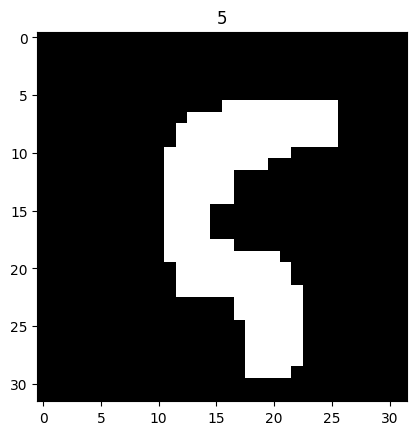

In [23]:
plt.imshow(x_train1[100])
plt.title(f'{np.argmax(y_train1[100])}')

In [24]:
x_train1=x_train1/255
x_test1=x_test1/255

x_train=x_train/255
x_test=x_test/255


In [25]:
len(x_test1)

10100

In [26]:

# input =keras.Input(shape=(28,28,1))
# x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
# x = MaxPooling2D()(x)
# x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
# x = MaxPooling2D()(x)
# x = Flatten()(x)
# x = Dense(64,activation='relu')(x)
# output = Dense(10,activation='softmax')(x)

# model =keras.Model(input,output)
# model.summary()


In [27]:
print('augment train data shape ',x_train1.shape)
print('augment test data shape ',x_test1.shape)
# x_train.shape
# x_test.shape

augment train data shape  (120000, 32, 32, 3)
augment test data shape  (10100, 32, 32, 3)


In [30]:
model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15)

In [32]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[early_stop])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7823 - loss: 0.9196

KeyboardInterrupt: 

Text(0, 0.5, 'loss')

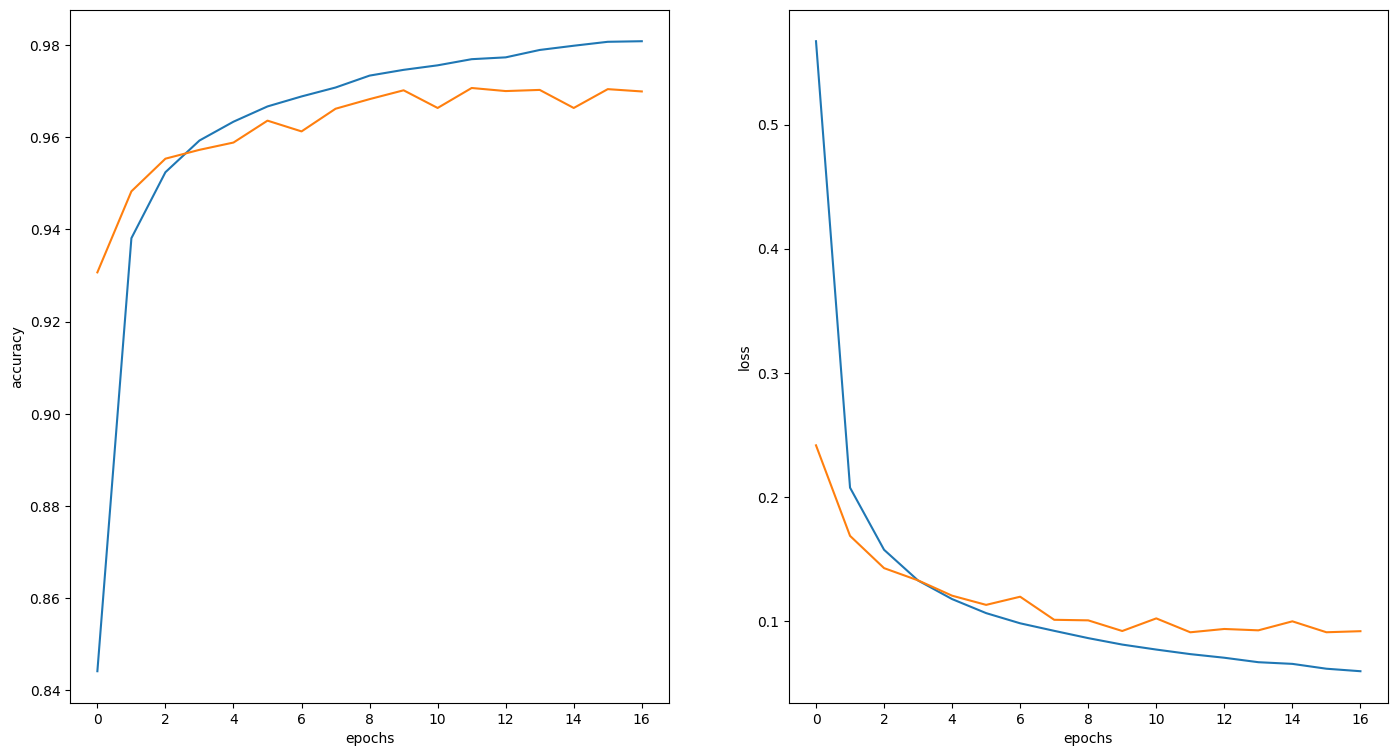

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:

# input =keras.Input(shape=(28,28,1))
# x = Conv2D(filters=32,kernel_size = (3,3),activation='relu',strides=(1,1))(input)
# x = MaxPooling2D()(x)
# x = Conv2D(filters=64,kernel_size = (3,3),activation='relu',strides=(1,1))(x)
# x = MaxPooling2D()(x)
# x = Flatten()(x)
# x = Dense(64,activation='relu')(x)
# output = Dense(10,activation='softmax')(x)

# augment_model =keras.Model(input,output)
# augment_model.summary()


augment_model = Sequential()
augment_model.add(tf.keras.Input(shape=(32, 32, 3)))
augment_model.add(conv_base)
augment_model.add(Flatten())
augment_model.add(Dense(512,activation='relu'))
augment_model.add(Dense(256,activation='relu'))
augment_model.add(Dense(10,activation='softmax'))



In [ ]:
augment_model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
history1=augment_model.fit(x_train1,y_train1,epochs=111,validation_split=0.2, callbacks=[early_stop])

Epoch 1/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.4820 - loss: 1.7287 - val_accuracy: 0.7022 - val_loss: 0.9874
Epoch 2/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.7897 - loss: 0.7524 - val_accuracy: 0.7798 - val_loss: 0.7362
Epoch 3/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8427 - loss: 0.5475 - val_accuracy: 0.8161 - val_loss: 0.6123
Epoch 4/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8704 - loss: 0.4489 - val_accuracy: 0.8392 - val_loss: 0.5395
Epoch 5/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8846 - loss: 0.3896 - val_accuracy: 0.8529 - val_loss: 0.4893
Epoch 6/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8965 - loss: 0.3508 - val_accuracy: 0.8628 - val_loss: 0.4515
Epoch 7/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9062 - loss: 0.3184 - val_accuracy: 0.8705 - val_loss: 0.4247
Epoch 8/111
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.9112 

In [ ]:
plt.figure(figsize=(17,9))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.subplot(1,2,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)
loss3,accuracy3=model.evaluate(x_test1,y_test1)

loss2,accuracy2=augment_model.evaluate(x_test,y_test)
loss2,accuracy1=augment_model.evaluate(x_test1,y_test1)

print(accuracy)
print(accuracy3)

print(accuracy2)
print(accuracy1)